<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

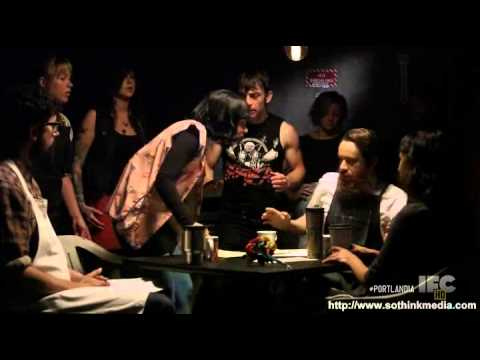

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/mai/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
!pip install pandas 
import pandas as pd

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# Imports
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import spacy
from spacy.tokenizer import Tokenizer 
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [5]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [6]:
#exploring data
shops.shape

(7616, 3)

In [7]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

## Data Cleaning  

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
#case normalization, remove date, extra spaces, number of check-ins
shops['full_review_text'] = shops["full_review_text"].str.lower()

In [9]:
shops['full_review_text'] = shops['full_review_text'].str.split(" ",2).str[2]

In [10]:
#rename review column
shops['review'] = shops['full_review_text']
shops['review'].head()

0    1 check-in love love loved the atmosphere! eve...
1    listed in date night: austin, ambiance in aust...
2    1 check-in listed in brunch spots i loved the ...
3    very cool decor! good drinks nice seating  how...
4    1 check-in they are located within the northcr...
Name: review, dtype: object

In [11]:
#remove star rating text
shops['star_rating'] = shops['star_rating'].str.replace(r"[a-zA-Z]",'')
shops['star_rating'].head()

0     5.0   
1     4.0   
2     4.0   
3     2.0   
4     4.0   
Name: star_rating, dtype: object

In [12]:
#make the column into correct dtype
shops['star_rating'] = shops['star_rating'].astype(float)
shops['star_rating'].head()

0    5.0
1    4.0
2    4.0
3    2.0
4    4.0
Name: star_rating, dtype: float64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [13]:
#Tokenizer
tokenizer = Tokenizer(nlp.vocab)
import re
def tokenize(text):
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens
shops['review_tokens'] = shops['full_review_text'].apply(tokenize)
shops['review_tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: review_tokens, dtype: object

In [14]:
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['review_tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [15]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [16]:
wc = count(shops['review_tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13,the,6847,34809,1.0,0.044975,0.044975,0.899028
8,and,6864,26650,2.0,0.034433,0.079408,0.901261
36,a,6246,22755,3.0,0.029401,0.108809,0.820116
34,i,5528,20237,4.0,0.026147,0.134956,0.725840
30,to,5653,17164,5.0,0.022177,0.157132,0.742253


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [17]:
good_shops = shops[shops['star_rating'] >= 4]
bad_shops = shops[shops['star_rating'] < 4]
good_shops.shape, bad_shops.shape

((6140, 5), (1476, 5))

In [18]:
gs = count(good_shops['review_tokens'])
gs.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13,the,5479,26616,1.0,0.044701,0.044701,0.892345
8,and,5545,21311,2.0,0.035791,0.080492,0.903094
36,a,4983,17706,3.0,0.029737,0.110229,0.811564
34,i,4344,14952,4.0,0.025111,0.135340,0.707492
30,to,4452,12763,5.0,0.021435,0.156775,0.725081


In [19]:
bs = count(bad_shops['review_tokens'])
bs.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,the,1368,8193,1.0,0.045889,0.045889,0.926829
9,and,1319,5339,2.0,0.029904,0.075793,0.893631
175,i,1184,5285,3.0,0.029601,0.105394,0.802168
27,a,1263,5049,4.0,0.028280,0.133674,0.855691
229,to,1201,4401,5.0,0.024650,0.158324,0.813686


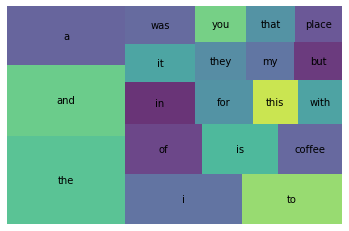

In [20]:
import squarify
import matplotlib.pyplot as plt

gs_top20 = gs[gs['rank'] <= 20]

squarify.plot(sizes=gs_top20['pct_total'], label=gs_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


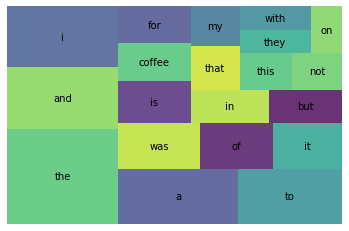

In [21]:
import squarify
import matplotlib.pyplot as plt

bs_top20 = bs[bs['rank'] <= 20]

squarify.plot(sizes=bs_top20['pct_total'], label=bs_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


In [22]:
tokens = []
""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['review'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [23]:
#improve with stop words
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'i', "it's", "i'm","i've",'and', 'coffee', 'coffee.', 'shop',
                                            'check-in', '1', "don't", '-'])

In [24]:
#add in the stop words
tokens = []

for doc in tokenizer.pipe(shops['review'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [25]:
good_shops = shops[shops['star_rating'] >= 4]
bad_shops = shops[shops['star_rating'] < 4]
good_shops.shape, bad_shops.shape

((6140, 6), (1476, 6))

In [26]:
gs = count(good_shops['tokens'])

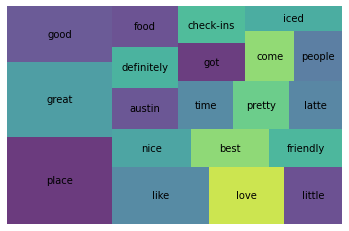

In [27]:
gs_top20 = gs[gs['rank'] <= 20]

squarify.plot(sizes=gs_top20['pct_total'], label=gs_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [28]:
bs = count(bad_shops['tokens'])

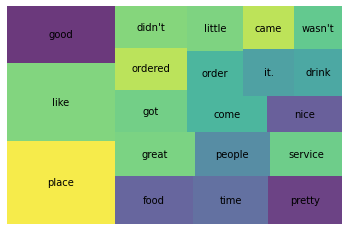

In [29]:
bs_top20 = bs[bs['rank'] <= 20]

squarify.plot(sizes=bs_top20['pct_total'], label=bs_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [43]:
#visualize the difference in word counts between good and bad reviews
#1st merge a df with both good and bad review word counts
twc = pd.merge(gs, bs, how='outer', on='word', suffixes=('_good', '_bad'))
twc = twc.fillna(0)
twc.head()

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad
0,place,2432.0,3389.0,1.0,0.011726,0.011726,0.396091,597.0,875.0,1.0,0.010604,0.010604,0.404472
1,great,2174.0,2902.0,2.0,0.010041,0.021767,0.354072,264.0,348.0,7.0,0.004217,0.045144,0.178862
2,good,1643.0,2180.0,3.0,0.007543,0.029310,0.267590,441.0,599.0,3.0,0.007259,0.027971,0.298780
3,like,1486.0,2068.0,4.0,0.007155,0.036466,0.242020,548.0,834.0,2.0,0.010107,0.020712,0.371274
4,love,1263.0,1604.0,5.0,0.005550,0.042016,0.205700,171.0,202.0,21.0,0.002448,0.089464,0.115854


In [46]:
#create new column for difference
#remove irrelevant +/- 
twc['difference'] = abs(twc['pct_total_good'] - twc['pct_total_bad'])
twc.head()

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad,difference
4666,stunning,7.0,7.0,4667.0,0.000024,0.823931,0.00114,2.0,2.0,4813.0,0.000024,0.846608,0.001355,1.777968e-08
4870,contacted,7.0,7.0,4871.0,0.000024,0.828872,0.00114,2.0,2.0,6453.0,0.000024,0.886359,0.001355,1.777968e-08
4872,ordered:,7.0,7.0,4873.0,0.000024,0.828920,0.00114,2.0,2.0,5845.0,0.000024,0.871622,0.001355,1.777968e-08
4877,catering,7.0,7.0,4878.0,0.000024,0.829041,0.00114,2.0,2.0,6413.0,0.000024,0.885389,0.001355,1.777968e-08
4903,large.,7.0,7.0,4904.0,0.000024,0.829671,0.00114,2.0,2.0,4834.0,0.000024,0.847117,0.001355,1.777968e-08


In [48]:
# sort in useful order
twc = twc.sort_values(by=['difference'], ascending=False)
twc.head()

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad,difference
1,great,2174.0,2902.0,2.0,0.010041,0.021767,0.354072,264.0,348.0,7.0,0.004217,0.045144,0.178862,0.005824
4,love,1263.0,1604.0,5.0,0.005550,0.042016,0.205700,171.0,202.0,21.0,0.002448,0.089464,0.115854,0.003102
3,like,1486.0,2068.0,4.0,0.007155,0.036466,0.242020,548.0,834.0,2.0,0.010107,0.020712,0.371274,0.002952
7,best,951.0,1093.0,8.0,0.003782,0.053863,0.154886,64.0,72.0,169.0,0.000873,0.296047,0.043360,0.002909
16,check-ins,929.0,930.0,17.0,0.003218,0.084426,0.151303,100.0,100.0,104.0,0.001212,0.229282,0.067751,0.002006


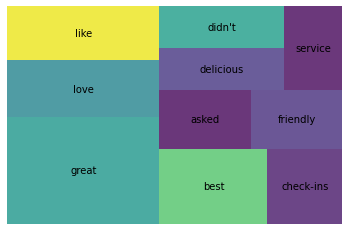

In [50]:
#top 15 largest differences between good and bad shops
twc_top15 = twc.head(n=10)

squarify.plot(sizes=twc_top15['difference'], label=twc_top15['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [36]:
#Lets add lemmatization
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

In [34]:
shops['lemmas'] = shops['review'].apply(get_lemmas)
shops['lemmas'].head()

0    [1, check, love, love, love, atmosphere, corne...
1    [list, date, night, austin, ambiance, austin, ...
2    [1, check, list, brunch, spot, love, eclectic,...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [1, check, locate, northcross, mall, shopping,...
Name: lemmas, dtype: object

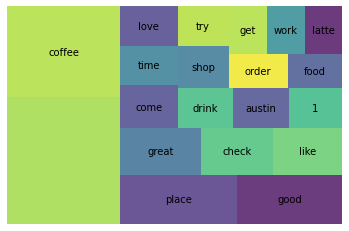

In [35]:
#visualize whole df 
lshops = count(shops['lemmas'])
lshops_top20 = lshops[lshops['rank'] <= 20]

squarify.plot(sizes=lshops_top20['pct_total'], label=lshops_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [37]:
#now visualize top lemmas for good and bad shops
good_shops = shops[shops['star_rating'] >= 4]
bad_shops = shops[shops['star_rating'] < 4]

lgs = count(good_shops['lemmas'])
lbs = count(bad_shops['lemmas'])

lgs_top20 = lgs[lgs['rank'] <= 20]
lbs_top20 = lbs[lbs['rank'] <= 20]

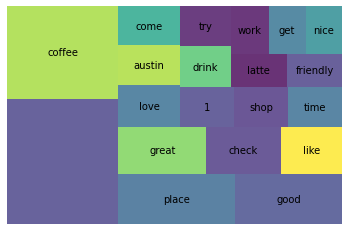

In [38]:
#good shops 
squarify.plot(sizes=lgs_top20['pct_total'], label=lgs_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

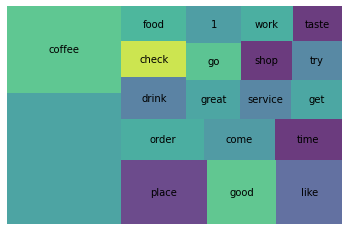

In [39]:
#bad shops
squarify.plot(sizes=lbs_top20['pct_total'], label=lbs_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

